In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_excel('E-commerce.xlsx')

In [3]:
df.columns

Index(['server_time', 'device_type', 'user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'impression_time', 'app_code',
       'os_version', 'is_4G', 'is_click'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   server_time      2025 non-null   datetime64[ns]
 1   device_type      2025 non-null   object        
 2   user_id          2022 non-null   float64       
 3   session_id       2024 non-null   float64       
 4   item_id          2023 non-null   float64       
 5   item_price       2024 non-null   float64       
 6   category         2019 non-null   float64       
 7   product_type     2024 non-null   float64       
 8   impression_time  2025 non-null   datetime64[ns]
 9   app_code         2024 non-null   float64       
 10  os_version       2016 non-null   object        
 11  is_4G            2025 non-null   int64         
 12  is_click         2025 non-null   int64         
dtypes: datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 205.8+ KB


In [5]:
df.describe()

,user_id,session_id,item_id,item_price,category,product_type,app_code,is_4G,is_click
count,2022.000000,2.024000e+03,2023.000000,2024.000000,2019.000000,2024.000000,2024.000000,2025.000000,2025.000000
mean,46714.461919,5.473724e+05,63505.154721,6661.115119,10.290738,5359.607213,244.741107,0.342222,0.049877
std,26401.598808,3.108620e+05,36830.177344,17296.372880,4.961514,3076.114288,124.477650,0.474571,0.217744
min,10.000000,1.694000e+03,176.000000,16.000000,0.000000,6.000000,1.000000,0.000000,0.000000
25%,24853.000000,2.738070e+05,33845.500000,1465.000000,7.000000,2758.750000,190.000000,0.000000,0.000000
50%,46248.000000,5.440370e+05,62896.000000,2425.000000,11.000000,5355.500000,207.000000,0.000000,0.000000
75%,69375.500000,7.996875e+05,91322.000000,4793.000000,14.000000,8121.000000,371.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,239360.000000,17.000000,10573.000000,508.000000,1.000000,1.000000


In [6]:
##Finding null values

df.isna().sum()

server_time        0
device_type        0
user_id            3
session_id         1
item_id            2
item_price         1
category           6
product_type       1
impression_time    0
app_code           1
os_version         9
is_4G              0
is_click           0
dtype: int64

In [7]:
df1 = df.drop('os_version', axis=1)
df1

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2018-11-03 12:39:00,android,8146.0,284263.0,5754.0,2125.0,13.0,1762.0,2018-11-15 09:46:00,207.0,1,0
2021,2018-11-03 12:39:00,android,43622.0,284263.0,28621.0,2874.0,10.0,9375.0,2018-11-15 09:46:00,207.0,1,0
2022,2018-11-03 12:41:00,android,12923.0,284263.0,28621.0,6105.0,17.0,2637.0,2018-11-15 09:46:00,3.0,1,0
2023,2018-10-20 22:59:00,android,26523.0,418685.0,36253.0,3444.0,7.0,2037.0,2018-11-15 09:47:00,207.0,0,0


In [10]:
df1['user_id'].fillna(method='ffill', inplace=True)
df1['session_id'].fillna(method='ffill', inplace=True)
df1['item_id'].fillna(method='ffill', inplace=True)
df1['app_code'].fillna(method='ffill', inplace=True)

In [16]:
for i  in ['item_price', 'category', 'product_type']:
    df[i]= df[i].fillna(df[i].mode())

In [17]:
df1.isna().sum()

server_time        0
device_type        0
user_id            0
session_id         0
item_id            0
item_price         0
category           0
product_type       0
impression_time    0
app_code           0
is_4G              0
is_click           0
dtype: int64

In [18]:
##LabelEncoding
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
df['device_type'].unique()

array(['android'], dtype=object)

In [22]:
df['device_type'] = le.fit_transform(df['device_type'])

In [23]:
df['device_type'].unique()

array([0])

In [24]:
df.head(5)

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,0,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,0,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,0,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,0,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,0,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [26]:
##One Hot Encoding
df = pd.get_dummies(df)
df.head(10)

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,is_4G,is_click,os_version_intermediate,os_version_latest,os_version_old
0,2018-10-18 14:27:00,0,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,0,0,0,0,1
1,2018-10-18 14:27:00,0,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,0,1,0
2,2018-10-18 14:43:00,0,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,1,0,1,0,0
3,2018-10-18 14:46:00,0,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,0,0,1,0
4,2018-10-18 14:46:00,0,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,0,0,0,1,0
5,2018-10-18 14:47:00,0,67352.0,268465.0,44459.0,953.0,9.0,703.0,2018-11-15 00:03:00,409.0,1,0,0,1,0
6,2018-10-22 09:48:00,0,64356.0,295495.0,40228.0,18118.0,16.0,2537.0,2018-11-15 00:03:00,190.0,0,0,1,0,0
7,2018-10-26 09:07:00,0,27329.0,675965.0,58320.0,17856.0,16.0,9641.0,2018-11-15 00:04:00,481.0,0,0,0,0,0
8,2018-10-26 09:08:00,0,83318.0,675965.0,129641.0,2868.0,7.0,842.0,2018-11-15 00:05:00,386.0,0,0,0,0,1
9,2018-11-04 09:14:00,0,70206.0,63432.0,64835.0,4032.0,17.0,623.0,2018-11-15 00:05:00,190.0,0,0,0,1,0


In [27]:
df.columns

Index(['server_time', 'device_type', 'user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'impression_time', 'app_code',
       'is_4G', 'is_click', 'os_version_intermediate', 'os_version_latest',
       'os_version_old'],
      dtype='object')

In [28]:
df.shape

(2025, 15)

In [30]:
Y = df[['item_price', 'category', 'product_type']]

In [31]:
Y.corr()

,item_price,category,product_type
item_price,1.000000,0.050378,-0.022924
category,0.050378,1.000000,-0.014132
product_type,-0.022924,-0.014132,1.000000


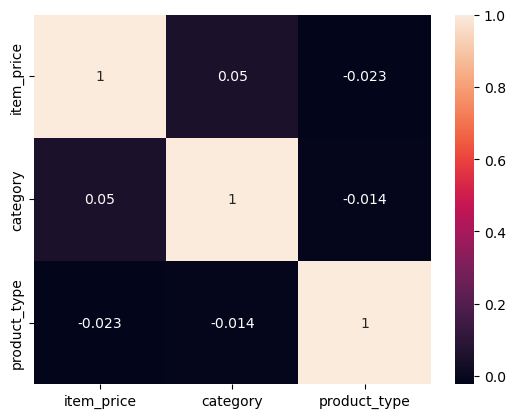

In [32]:
sns.heatmap(Y.corr(),annot = True)
plt.show()